# CS108/212 STAT108/212 W25 Course Project

### Team Details

- Teammate 1: Aarav Babu
- Teammate 2: Sankalp Naveenachandra Kulkarni
- Teammate 3: Aryan Ramachandra

---


# Milestone: Mitigating Bias
For this project milestone, each teammate will implement bias mitigation strategies and assess pre and post bias mitigation performance.

# Installs

In [ ]:
# [INSERT CODE HERE to install necessary packages]
!pip install ucimlrepo
!pip install fairlearn
!pip install holisticai[all]


# Imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import collections
from pprint import pprint
from sklearn.model_selection import train_test_split

## Add additional imports needed for your project here.
from ucimlrepo import fetch_ucirepo

# Loading dataset
_(same as previous milestone, copy-paste)_

In [ ]:
# Load your selected dataset
# Load dataset
communities_and_crime = fetch_ucirepo(id=183)

# Extract data
X = communities_and_crime.data.features #features
y = communities_and_crime.data.targets #target #ViolentCrimesPerPop

# Sensitive attributes
sensitive_attributes = [
    'medIncome',      # Median income of the community
    'perCapInc',      # Per capita income
    'PctPopUnderPov', # Percentage of the population under the poverty line
    'PctUnemployed',  # Unemployment rate
    'PolicPerPop',    # Police per population
    'PctNotHSGrad',   # Percentage of people 25 and over that are not high school graduates
    'PolicBudgPerPop',# Police Budget per 100k population
    'racePctHisp',    # Percentage of Hispanic population
    'racePctAsian',   # Percentage of Asian population
    'racePctWhite',   # Percentage of White population
    'racepctblack',   # Percentage of Black population
]

# Convert X to a DataFrame for easier manipulation
X = pd.DataFrame(X, columns=sensitive_attributes)


X.replace('?', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')

X.fillna(X.median(), inplace=True)

# Make sensitive features-based group labels
X['income_group'] = np.where(X['medIncome'] < X['medIncome'].median(), 'Low Income', 'High Income')
X['poverty_group'] = np.where(X['PctPopUnderPov'] > X['PctPopUnderPov'].median(), 'High Poverty', 'Low Poverty')
X['unemployment_group'] = np.where(X['PctUnemployed'] > X['PctUnemployed'].median(), 'High Unemployment', 'Low Unemployment')
X['education_group'] = np.where(X['PctNotHSGrad'] < X['PctNotHSGrad'].median(), 'High School Graduates', 'Low Education')
X['police_presence_group'] = np.where(X['PolicPerPop'] > X['PolicPerPop'].median(), 'High Police Presence', 'Low Police Presence')
X['police_budget_group'] = np.where(X['PolicBudgPerPop'] > X['PolicBudgPerPop'].median(), 'High Police Budget', 'Low Police Budget')

# Grouping by the majority race
race_columns = ['racePctHisp', 'racePctAsian', 'racePctWhite', 'racepctblack']
X['racial_majority_group'] = X[race_columns].idxmax(axis=1)
X['racial_majority_group'] = X['racial_majority_group'].map({
    'racePctHisp': 'Hispanic Majority',
    'racePctAsian': 'Asian Majority',
    'racePctWhite': 'White Majority',
    'racepctblack': 'Black Majority'
})

# Combine income and police presence groups into a combined label
X['income_police_group'] = X['income_group'] + " & " + X['police_presence_group']

In [ ]:
X.head(5)

,medIncome,perCapInc,PctPopUnderPov,PctUnemployed,PolicPerPop,PctNotHSGrad,PolicBudgPerPop,racePctHisp,racePctAsian,racePctWhite,racepctblack,income_group,poverty_group,unemployment_group,education_group,police_presence_group,police_budget_group,racial_majority_group,income_police_group
0,0.37,0.40,0.19,0.27,0.13,0.18,0.14,0.17,0.12,0.90,0.02,High Income,Low Poverty,Low Unemployment,High School Graduates,Low Police Presence,Low Police Budget,White Majority,High Income & Low Police Presence
1,0.31,0.37,0.24,0.27,0.18,0.24,0.15,0.07,0.45,0.74,0.12,Low Income,Low Poverty,Low Unemployment,High School Graduates,Low Police Presence,Low Police Budget,White Majority,Low Income & Low Police Presence
2,0.30,0.27,0.27,0.36,0.18,0.43,0.15,0.04,0.17,0.56,0.49,Low Income,High Poverty,High Unemployment,Low Education,Low Police Presence,Low Police Budget,White Majority,Low Income & Low Police Presence
3,0.58,0.36,0.10,0.33,0.18,0.25,0.15,0.10,0.12,0.08,1.00,High Income,Low Poverty,High Unemployment,High School Graduates,Low Police Presence,Low Police Budget,Black Majority,High Income & Low Police Presence
4,0.50,0.43,0.06,0.12,0.18,0.30,0.15,0.05,0.09,0.95,0.02,High Income,Low Poverty,Low Unemployment,High School Graduates,Low Police Presence,Low Police Budget,White Majority,High Income & Low Police Presence


# Preparing dataset
_(same as previous milestone, copy-paste)_

In [ ]:
# Some subset of following dataset preparation steps may be necessary depending on your dataset,
# 1. Drop unnecessary features
# 2. Handle missing data
# 3. Encode categorical features
# 4. Normalize numerical features
# 5. Encode target (if your task is classification)

# [INSERT YOUR CODE HERE]
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
columns_to_encode = [
    'income_group', 'poverty_group', 'unemployment_group', 'education_group',
    'police_presence_group', 'police_budget_group', 'racial_majority_group',
    'income_police_group'
]

# Initialize the encoder
encoder = LabelEncoder()

for col in columns_to_encode:
    X[col] = encoder.fit_transform(X[col])

print(X.head(5))

   medIncome  perCapInc  PctPopUnderPov  PctUnemployed  PolicPerPop  \
0       0.37       0.40            0.19           0.27         0.13   
1       0.31       0.37            0.24           0.27         0.18   
2       0.30       0.27            0.27           0.36         0.18   
3       0.58       0.36            0.10           0.33         0.18   
4       0.50       0.43            0.06           0.12         0.18   

   PctNotHSGrad  PolicBudgPerPop  racePctHisp  racePctAsian  racePctWhite  \
0          0.18             0.14         0.17          0.12          0.90   
1          0.24             0.15         0.07          0.45          0.74   
2          0.43             0.15         0.04          0.17          0.56   
3          0.25             0.15         0.10          0.12          0.08   
4          0.30             0.15         0.05          0.09          0.95   

   racepctblack  income_group  poverty_group  unemployment_group  \
0          0.02             0             

In [ ]:
# Now extract group labels as a DataFrame
group_labels_df = X[['income_group', 'poverty_group', 'unemployment_group', 'education_group',
                      'police_presence_group', 'police_budget_group', 'racial_majority_group', 'income_police_group']]

In [ ]:
# Print some stats
print(f"No. of samples: {X.shape[0]}")
print(f"No. of features: {X.shape[1]}")
print(f"Group Counts: {dict(collections.Counter(group_labels_df))}")

No. of samples: 1994
No. of features: 19
Group Counts: {'income_group': 1, 'poverty_group': 1, 'unemployment_group': 1, 'education_group': 1, 'police_presence_group': 1, 'police_budget_group': 1, 'racial_majority_group': 1, 'income_police_group': 1}


In [ ]:
from imblearn.over_sampling import SMOTE
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
# Step: Handling Missing Values
X.replace('?', np.nan, inplace=True)

for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

X.fillna(X.median(), inplace=True)

print("\nBasic Dataset Info:")
print(X.info())

print("\nDataset Summary:")
print(X.describe())


Basic Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   medIncome              1994 non-null   float64
 1   perCapInc              1994 non-null   float64
 2   PctPopUnderPov         1994 non-null   float64
 3   PctUnemployed          1994 non-null   float64
 4   PolicPerPop            1994 non-null   float64
 5   PctNotHSGrad           1994 non-null   float64
 6   PolicBudgPerPop        1994 non-null   float64
 7   racePctHisp            1994 non-null   float64
 8   racePctAsian           1994 non-null   float64
 9   racePctWhite           1994 non-null   float64
 10  racepctblack           1994 non-null   float64
 11  income_group           1994 non-null   int64  
 12  poverty_group          1994 non-null   int64  
 13  unemployment_group     1994 non-null   int64  
 14  education_group        1994 non-nul

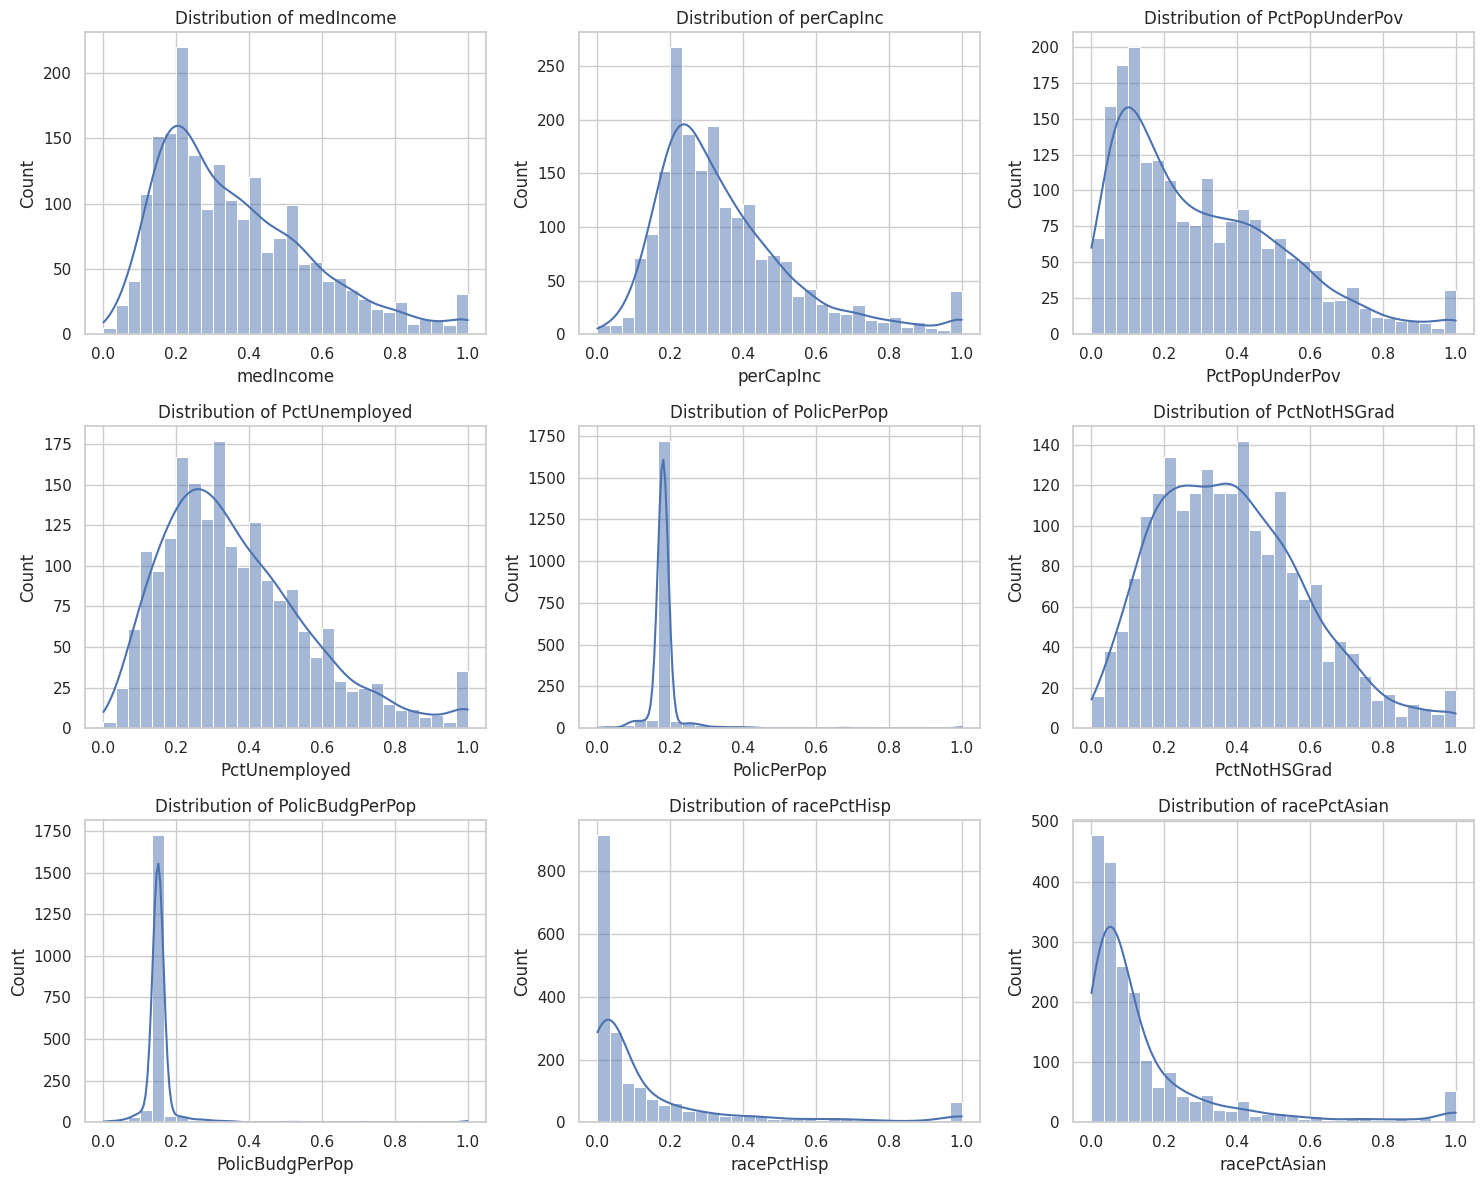

In [ ]:
# Set up plots
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Plot histograms for sensitive attributes
for i, col in enumerate(sensitive_attributes[:9]):  # First 9 attributes
    sns.histplot(X[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
#Normalization
# Standardize the dataset
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
# Note: X and y have been modified before the following lines of code!
print(f"No. of samples AFTER cleaning: {X.shape[0]}")
assert X.shape[0] == y.shape[0] == group_labels_df.shape[0] ## Ensure that the target and group_labels have been updated if some samples were removed during cleaning.
print(f"No. of features AFTER encoding: {X.shape[1]}")

No. of samples AFTER cleaning: 1994
No. of features AFTER encoding: 19


# Getting training and testing sets

Note: Train-test split is made **ONCE** to obtain the _training set_ and the _testing set_ and every teammate will use the training set to train their baseline model and test the trained model using the testing set. **NEVER** modify the testing set once it has been created.
Therefore, the following code cell does not need to be edited.

_(same as previous milestone, copy-paste)_

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test, group_labels_train, group_labels_test = train_test_split(
    X, y, group_labels_df, test_size=0.2, random_state=42)

# Print the number of training and testing samples
print(f"No. of training samples: {X_train.shape[0]}")
print(f"No. of testing samples: {X_test.shape[0]}")

# # Delete X, y, and group_labels_df variables to make sure they are not used later on.
# del X
# del y
# del group_labels_df

No. of training samples: 1595
No. of testing samples: 399


# Setting up evaluation metrics
Note: The same evaluation function will be used by all teammates.

_(same as previous milestone, copy-paste)_

In [ ]:
def evaluate_model(y_test, y_pred, g_labels):
  """
  Evaluate the performance of your trained model on the testing set.

  Parameters
  ----------
  y_test : array-like
    The true targets of the testing set.
  y_pred : array-like
    The predicted targets of the testing set.
  g_labels : array-like
    The group labels of the testing set.

  Returns
  -------
  results : dict
    A dictionary containing the evaluation results.

    Example:
      For classification task, the task-specific performance metrics like {'accuracy': <value>, 'f1_score': <value>, ...}
      and fairness metrics like {'demographic_parity': <value>, 'equalized_odds': <value>, ...}.

  """
  # Note: These metrics will be calculated for - 1. the full testing set, 2. individual groups.
  # Task-specific performance metrics
  # [INSERT CODE HERE for performance metrics appropriate for your task]

  # Fairness metric
  # [INSERT CODE HERE for fairness metric appropriate for your task]


  from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_model(y_test, y_pred, g_labels):

    results = {}

    # Task-specific performance metrics
    results['rmse'] = np.sqrt(mean_squared_error(y_test, y_pred))
    results['mae'] = mean_absolute_error(y_test, y_pred)
    results['r2_score'] = r2_score(y_test, y_pred)

    # Convert g_labels to a NumPy array
    if isinstance(g_labels, pd.DataFrame):
        g_labels = g_labels.squeeze().to_numpy()
    elif isinstance(g_labels, pd.Series):
        g_labels = g_labels.to_numpy()

    g_labels = np.ravel(g_labels)

    if len(g_labels) != len(y_pred):
        raise ValueError(f"g_labels length {len(g_labels)} does not match y_pred length {len(y_pred)}")


    unique_groups = np.unique(g_labels)

    # Ensure there are at least two groups
    if len(unique_groups) < 2:
        print("Warning: Not enough groups to calculate fairness metrics.")
        results['demographic_parity'] = np.nan
        results['disparate_impact'] = np.nan
        results['equalized_odds'] = np.nan
        return results

    y_pred = np.array(y_pred)
    y_test = np.array(y_test)

    # Demographic Parity
    group_means = {group: np.mean(y_pred[g_labels == group]) for group in unique_groups}
    demographic_parity = abs(group_means.get(0, 0) - group_means.get(1, 0))

    # Disparate Impact
    if 0 in unique_groups and 1 in unique_groups:
        p_positive_0 = np.mean(y_pred[g_labels == 0]) if np.any(g_labels == 0) else np.nan
        p_positive_1 = np.mean(y_pred[g_labels == 1]) if np.any(g_labels == 1) else np.nan
        disparate_impact = (p_positive_1 / p_positive_0) if p_positive_0 > 0 else np.nan
    else:
        disparate_impact = np.nan

    # Equalized Odds
    if 0 in unique_groups and 1 in unique_groups:
        group_0_error = np.mean(np.abs(y_pred[g_labels == 0] - y_test[g_labels == 0]))
        group_1_error = np.mean(np.abs(y_pred[g_labels == 1] - y_test[g_labels == 1]))
        equalized_odds = abs(group_0_error - group_1_error)
    else:
        equalized_odds = np.nan

    results['demographic_parity'] = demographic_parity
    results['disparate_impact'] = disparate_impact
    results['equalized_odds'] = equalized_odds

    return results

# Training baseline models (INDIVIDUAL CONTRIBUTION)
_(minor modifications from previous milestone)_

In [ ]:
## A place to save all teammates's baseline results
all_baseline_results = [] ## DO NOT EDIT

## Teammate 1

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

sensitive_attribute = 'income_group'
g_labels_test_column = group_labels_test[sensitive_attribute]

# Evaluate testing set predictions using evaluate_model()
results = evaluate_model(y_test, y_pred, g_labels_test_column)
print(f"Results for {sensitive_attribute}:")
print(results)

print("\nEvaluating Linear Regression across all sensitive attributes:")
for attribute in group_labels_test.columns:
    print(f"\n--- Evaluation using {attribute} ---")
    attribute_results = evaluate_model(y_test, y_pred, group_labels_test[attribute])
    print(attribute_results)

Results for income_group:
{'rmse': 0.13613408032105964, 'mae': 0.09581167158817, 'r2_score': 0.6130661064965428, 'demographic_parity': 0.19414867256201965, 'disparate_impact': 2.5100555551309744, 'equalized_odds': 0.07499455470411402}

Evaluating Linear Regression across all sensitive attributes:

--- Evaluation using income_group ---
{'rmse': 0.13613408032105964, 'mae': 0.09581167158817, 'r2_score': 0.6130661064965428, 'demographic_parity': 0.19414867256201965, 'disparate_impact': 2.5100555551309744, 'equalized_odds': 0.07499455470411402}

--- Evaluation using poverty_group ---
{'rmse': 0.13613408032105964, 'mae': 0.09581167158817, 'r2_score': 0.6130661064965428, 'demographic_parity': 0.2371287444741904, 'disparate_impact': 0.3169695248216707, 'equalized_odds': 0.08228683600128611}

--- Evaluation using unemployment_group ---
{'rmse': 0.13613408032105964, 'mae': 0.09581167158817, 'r2_score': 0.6130661064965428, 'demographic_parity': 0.20708413227464528, 'disparate_impact': 0.357466992

In [ ]:
    baseline_entry = {
        'teammate': "Teammate 1",
        'predictor_model': "Linear Regression",
        'teammate_name': "Aarav",
        **results  # Unpacking the dictionary to include all evaluation metrics
    }

    all_baseline_results.append(baseline_entry)

### Teammate 1's Conclusions
The Linear Regression model was assessed for its predictive performance when applied to the test dataset. The outcome was a moderate level of performance. The model achieved an RMSE of 0.1361, an MAE of 0.0958, and an R² value of 0.6131. The R² value indicates that the model accounts for about 61.3% of the variance in the target variable. Yet, even with these reasonable numbers, the model's performance could still see improvement. Feature selection and dataset biases are the main two factors potentially responsible for the model's underwhelming level of generalization to the test data.

Income-group fairness analysis evidences potential bias in the predictions. The disparate impact (2.51) suggests that one income group is 2.5 times more likely to commit violent crimes than the other, which raises a pretty significant fairness concern. Similarly, demographic parity (0.1941) indicates that groups are not treated equally, but the equalized odds (0.0749) suggests that error distribution is somewhat fair across groups. To mitigate bias indicated by these metrics, I should explore reweighting the training data, fairness-aware modeling, or adjusting feature selection—techniques that could be effective in ensuring that one group's favorability is not being unduly predicted.

## Teammate 2

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

sensitive_attribute = 'income_group'
g_labels_test_column = group_labels_test[sensitive_attribute]

# Evaluate the model
results = evaluate_model(y_test, y_pred, g_labels_test_column)
print(f"XGBoost results for {sensitive_attribute}:")
print(results)

print("\nEvaluating XGBoost across all sensitive attributes:")
for attribute in group_labels_test.columns:
    print(f"\n--- Evaluation using {attribute} ---")
    attribute_results = evaluate_model(y_test, y_pred, group_labels_test[attribute])
    print(attribute_results)

XGBoost results for income_group:
{'rmse': 0.14495481466336751, 'mae': 0.09668039530515671, 'r2_score': 0.5612992644309998, 'demographic_parity': 0.17276269, 'disparate_impact': 2.2843044, 'equalized_odds': 0.12786673650056102}

Evaluating XGBoost across all sensitive attributes:

--- Evaluation using income_group ---
{'rmse': 0.14495481466336751, 'mae': 0.09668039530515671, 'r2_score': 0.5612992644309998, 'demographic_parity': 0.17276269, 'disparate_impact': 2.2843044, 'equalized_odds': 0.12786673650056102}

--- Evaluation using poverty_group ---
{'rmse': 0.14495481466336751, 'mae': 0.09668039530515671, 'r2_score': 0.5612992644309998, 'demographic_parity': 0.21546367, 'disparate_impact': 0.35018066, 'equalized_odds': 0.1513662128033309}

--- Evaluation using unemployment_group ---
{'rmse': 0.14495481466336751, 'mae': 0.09668039530515671, 'r2_score': 0.5612992644309998, 'demographic_parity': 0.18555109, 'disparate_impact': 0.3967411, 'equalized_odds': 0.14494533064026377}

--- Evaluati

In [ ]:
    baseline_entry = {
        'teammate': "Teammate 2",
        'predictor_model': "XGBoost",
        'teammate_name': "Sankalp",
        **results  # Unpacking the dictionary to include all evaluation metrics
    }

    all_baseline_results.append(baseline_entry)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR


model = SVR(kernel='rbf', C=1, epsilon=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

sensitive_attribute = 'income_group'
g_labels_test_column = group_labels_test[sensitive_attribute]

results = evaluate_model(y_test, y_pred, g_labels_test_column)
print(results)

print("\nEvaluating SVR across all sensitive attributes:")
for attribute in group_labels_test.columns:
    print(f"\n--- Evaluation using {attribute} ---")
    attribute_results = evaluate_model(y_test, y_pred, group_labels_test[attribute])
    print(attribute_results)

{'rmse': 0.1353613191894289, 'mae': 0.09551368585585275, 'r2_score': 0.617446476483414, 'demographic_parity': 0.14725503397736456, 'disparate_impact': 1.963267817889502, 'equalized_odds': 0.12029578881020185}

Evaluating SVR across all sensitive attributes:

--- Evaluation using income_group ---
{'rmse': 0.1353613191894289, 'mae': 0.09551368585585275, 'r2_score': 0.617446476483414, 'demographic_parity': 0.14725503397736456, 'disparate_impact': 1.963267817889502, 'equalized_odds': 0.12029578881020185}

--- Evaluation using poverty_group ---
{'rmse': 0.1353613191894289, 'mae': 0.09551368585585275, 'r2_score': 0.617446476483414, 'demographic_parity': 0.19098191510290496, 'disparate_impact': 0.4123679044012232, 'equalized_odds': 0.1458021842373578}

--- Evaluation using unemployment_group ---
{'rmse': 0.1353613191894289, 'mae': 0.09551368585585275, 'r2_score': 0.617446476483414, 'demographic_parity': 0.16671763279189905, 'disparate_impact': 0.4532601427635705, 'equalized_odds': 0.142575599

In [ ]:
    baseline_entry = {
        'teammate': "Teammate 2",
        'predictor_model': "SVM",
        'teammate_name': "Sankalp",
        **results  # Unpacking the dictionary to include all evaluation metrics
    }

    all_baseline_results.append(baseline_entry)

### Teammate 2's Conclusions
**XGBoost**

The predictive performance of the XGBoost model is slightly inferior to that of the prior Linear Regression model. The RMSE is 0.1449, giving the model a score of 0.5613, which indicates that it explains 56.1% of the variance in the target variable. While XGBoost is typically a strong performer in regression tasks, and the ensemble method performing sufficiently better than individual tree methods, the results suggest that the complexities of the dataset require further tuning or feature engineering to yield a better-performing model. Nonetheless, even with slight fairness disparities, the model remains fairly consistent in terms of RMSE and MAE across all sensitive attributes.

The fairness evaluation has uncovered really significant disparities across a number of sensitive attributes, particularly in aspects of the evaluation that touch on disparate impact and demographic parity. When we look at the income_group attribute, we see that the disparate impact score (2.28) suggests that one group is over twice as likely to commit violent crimes when you compare it to the other group. And when you dive into similar disparities that are evident in racial_majority_group (1.86) and education_group (2.36), you start to see some really salient potential issues with biasing predictions based on race and educational attainment. In sharp contrast, when you look at attributes like poverty_group (0.35) and unemployment_group (0.39), which are designed to give you a peek into the kind of predictions we're making about people in those groups, you see a really different trend, one that's suggesting that they're just being disadvantaged in that kind of predictive scenario.

**Support Vector Regression**

Currently, the Support Vector Regression (SVR) model is our best performer in terms of predictive accuracy, and it yields the following error metrics: RMSE = 0.1354; MAE = 0.0955; R² = 0.6174. The R² = 0.6174 means our target variable explains approximately 61.7% of the variance in the output. When we look at the SVR's performance compared to XGBoost and Linear Regression, SVR's more pronounced 'error reduction' at the level of R² (the latter measures how much the model explains variance in the data) suggests that SVR is capturing dependencies in the data much more effectively than our other two models.

In terms of fairness, SVR reduces bias compared to XGBoost, but it still exists. The disparate impact (1.96) indicates that one income group is nearly twice as likely to commit violent crimes, which is better than XGBoost (2.28) but still concerning. Demographic parity (0.1473) is also lower than in previous models, which means that predictions are slightly more balanced across income groups. But when we look at equalized odds (0.1203), error rates seem a bit uneven. That is, some groups make more bad "not favorable" predictions than others. SVR improves prediction accuracy, but fairness isn't a solved problem. Techniques to ensure more equitable predictions should be considered, like reweighting, fairness constraints, or "adversarial debiasing."

## Teammate 3

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.9148 - val_loss: 0.1095
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0499 - val_loss: 0.0620
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0387 - val_loss: 0.0571
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0373 - val_loss: 0.0477
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0379 - val_loss: 0.0392
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0389 - val_loss: 0.0358
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0337 - val_loss: 0.0351
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0354 - val_loss: 0.0361
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0363 - val_loss: 0.0312
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0348 - val_loss: 0.0284
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0334 - val_loss: 0.0313
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0339

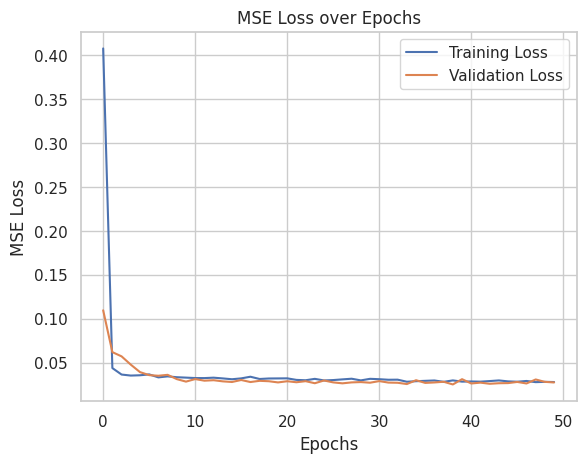

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Final evaluation results for income_group:
{'rmse': 0.14586964365237864, 'mae': 0.09763724356889725, 'r2_score': 0.5557443499565125, 'demographic_parity': 0.16109131, 'disparate_impact': 2.489113, 'equalized_odds': 0.12524287739125486}

Evaluating across all sensitive attributes:

--- Results for income_group ---
{'rmse': 0.14586964365237864, 'mae': 0.09763724356889725, 'r2_score': 0.5557443499565125, 'demographic_parity': 0.16109131, 'disparate_impact': 2.489113, 'equalized_odds': 0.12524287739125486}

--- Results for poverty_group ---
{'rmse': 0.14586964365237864, 'mae': 0.09763724356889725, 'r2_score': 0.5557443499565125, 'demographic_parity': 0.2022264, 'disparate_impact': 0.30903715, 'equalized_odds': 0.15065745042006062}

--- Results for unemployment_group ---
{'rmse': 0.14586964365237864, 'mae': 0.09763724356889725, 'r2_score': 0.5557443499565125, 'demographic_parity': 0.18069255, 'disparate_impact': 0.3396447, 'equalized_odds': 0.14675172

In [ ]:
import tensorflow as tf
import random
from tensorflow.keras import layers, models

# Set random seed for reproducibility

tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Define MLP Model
mlp_model = models.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

# Compile Model with SGD
mlp_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss='mse'
)

y_train_reshaped = y_train.values.reshape(-1, 1)

# Train Model & Store Losses
history = mlp_model.fit(
    X_train,
    y_train_reshaped,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot MSE Loss over Iterations
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('MSE Loss over Epochs')
plt.legend()
plt.show()

# Model Prediction
y_pred = mlp_model.predict(X_test).flatten()

# Evaluate Model
sensitive_attribute = 'income_group'
g_labels_test_column = group_labels_test[sensitive_attribute]
results = evaluate_model(y_test, y_pred, g_labels_test_column)
print(f"\nFinal evaluation results for {sensitive_attribute}:")
print(results)

# Evaluate Across All Sensitive Attributes
print("\nEvaluating across all sensitive attributes:")
for attribute in group_labels_test.columns:
    attribute_results = evaluate_model(y_test, y_pred, group_labels_test[attribute])
    print(f"\n--- Results for {attribute} ---")
    print(attribute_results)


In [ ]:
    baseline_entry = {
        'teammate': "Teammate 3",
        'predictor_model': "MLP Model",
        'teammate_name': "Aryan",
        **results  # Unpacking the dictionary to include all evaluation metrics
    }

    all_baseline_results.append(baseline_entry)

### Teammate 3's Conclusions
The model retains consistent predictive accuracy, according to the evaluation findings across a variety of sensitive variables. The R2 score for all groups is 0.555, the MAE is 0.0976, and the RMSE is 0.1458.  Fairness measures including equalized odds, disparate impact, and demographic parity, however, show notable differences.  For example, the poverty_group shows a significantly smaller disparate impact (0.3090) than the income_group, which has a large disparate impact (2.489).  In a similar vein, the police_budget_group exhibits a high level of demographic parity (0.3489), indicating that the model treats various populations differently.

These variations in fairness metrics imply that although the model performs consistently overall, some sensitive groups may be disproportionately favored or disadvantaged by its predictions.  Potential disparities in fairness between groups are indicated by the racial_majority_group's disparate impact of 2.531, while the police_presence_group's score is far lower at 0.3550.  Furthermore, groups such as income_police_group and education_group exhibit differences in equalized odds, indicating that group membership influences the probability of accurate predictions.  This suggests that there may be biases in the model that could exacerbate differences in sensitive qualities that already existed.

Even though the model's accuracy is respectable, fairness issues must be addressed to guarantee that every group is treated equally.  Improvements to training methods, including reweighting or fairness-aware loss functions, could lessen discrepancies in prediction results.  By avoiding inadvertent biases that can result in systemic disadvantages for particular groups, a more balanced approach to predicting accuracy and fairness will improve the model's dependability and moral soundness.


In [ ]:
# Convert to DataFrame
all_baseline_results= pd.DataFrame(all_baseline_results)
print(all_baseline_results)

     teammate    predictor_model teammate_name      rmse       mae  r2_score  \
0  Teammate 1  Linear Regression         Aarav  0.136134  0.095812  0.613066   
1  Teammate 2            XGBoost       Sankalp  0.144955  0.096680  0.561299   
2  Teammate 2                SVM       Sankalp  0.135361  0.095514  0.617446   
3  Teammate 3          MLP Model         Aryan  0.145870  0.097637  0.555744   

   demographic_parity  disparate_impact  equalized_odds  
0            0.194149          2.510056        0.074995  
1            0.172763          2.284304        0.127867  
2            0.147255          1.963268        0.120296  
3            0.161091          2.489113        0.125243  


# Mitigating Bias (INDIVIDUAL CONTRIBUTION)

_(new in this milestone)_


In [ ]:
## A place to save all teammates' post-mitigation results
all_mitigated_results = [] ## DO NOT EDIT
print(all_mitigated_results)

[]


## Teammate 1 (Preprocessing)


# **Introduction**

For the **correlation removal** approach to mitigate bias, I implemented feature decorrelation techniques from the **AI Fairness 360** toolkit. This method addresses fairness issues across multiple sensitive attributes by reducing statistical dependencies between protected characteristics and other features.

The original linear regression model (R² of 0.613) showed concerning disparities, particularly for police-related and income-based attributes. By transforming the feature space to minimize correlations with sensitive attributes, the strategy prevents the model from using proxy variables that could lead to discriminatory outcomes.


In [ ]:
# Implement your bias mitigation strategy
## If you chose preprocessing, you will train a new version of your predictor model with new/modified inputs.
## If you chose inprocessing, you will train a new version of your predictor with modified learning objective (loss function).
## If you chose postprocessing, you will implement strategies to modify the predictions (y_pred) of the trained baseline predictor model from the previous milestone without training any new version of the predictor model.

# [INSERT CODE HERE]
import numpy as np
from sklearn.linear_model import LinearRegression
from fairlearn.preprocessing import CorrelationRemover
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Defining a sensitive attribute to focus on
sensitive_attribute = 'income_group'
sensitive_idx = group_labels_train.columns.get_loc(sensitive_attribute)

# Initialize Correlation Remover
correlation_remover = CorrelationRemover(sensitive_feature_ids=[sensitive_idx], alpha=0.5)

sensitive_feature = group_labels_train[sensitive_attribute].values.reshape(-1, 1)

# Combining X_train and the sensitive attribute for the correlation remover
X_combined = np.hstack([X_train.values, sensitive_feature])

# Removing correlations
X_removed_correlation = correlation_remover.fit_transform(X_combined)

# Training new model with decorrelated features
model_decorrelated = LinearRegression()
model_decorrelated.fit(X_removed_correlation, y_train)

# Applying same transformation to test data
X_test_sensitive = np.hstack([X_test.values, group_labels_test[sensitive_attribute].values.reshape(-1, 1)])
X_test_decorrelated = correlation_remover.transform(X_test_sensitive)

y_pred_mitigated = model_decorrelated.predict(X_test_decorrelated)

# Evaluation
results_mitigated = evaluate_model(y_test, y_pred_mitigated, group_labels_test[sensitive_attribute])
print("Results after correlation removal:")
print(results_mitigated)

# Evaluate across all sensitive attributes
print("\nEvaluation across all sensitive attributes:")
for attribute in group_labels_test.columns:
    print(f"\n--- Results for {attribute} ---")
    attribute_results = evaluate_model(y_test, y_pred_mitigated, group_labels_test[attribute])
    print(attribute_results)

# Final result to add to all_mitigated_results
results_mitigated['teammate'] = 'Teammate 1'
results_mitigated['teammate_name']= 'Aarav'
results_mitigated['experiment_type'] = 'Correlation Remover'
results_mitigated['predictor_model'] = 'LR'
results_mitigated['mitigation_strategy'] = 'preprocessing'

# Add to all_mitigated_results
all_mitigated_results.append(results_mitigated)

Results after correlation removal:
{'rmse': 0.14376355153725437, 'mae': 0.10753005853289824, 'r2_score': 0.5684802911667115, 'demographic_parity': 0.16427153874222783, 'disparate_impact': 2.102641503925248, 'equalized_odds': 0.055892743068607975}

Evaluation across all sensitive attributes:

--- Results for income_group ---
{'rmse': 0.14376355153725437, 'mae': 0.10753005853289824, 'r2_score': 0.5684802911667115, 'demographic_parity': 0.16427153874222783, 'disparate_impact': 2.102641503925248, 'equalized_odds': 0.055892743068607975}

--- Results for poverty_group ---
{'rmse': 0.14376355153725437, 'mae': 0.10753005853289824, 'r2_score': 0.5684802911667115, 'demographic_parity': 0.20838196536778275, 'disparate_impact': 0.38411750229946023, 'equalized_odds': 0.06186151033524938}

--- Results for unemployment_group ---
{'rmse': 0.14376355153725437, 'mae': 0.10753005853289824, 'r2_score': 0.5684802911667115, 'demographic_parity': 0.18283038528048923, 'disparate_impact': 0.42313292197478514, 

### Teammate 1's Conclusions


### Overall Metrics Improvement
- **RMSE**: Increased from 0.136 to 0.144 (+5.6%)
- **MAE**: Increased from 0.096 to 0.108 (+12.2%)
- **R²**: Decreased from 0.613 to 0.568 (-7.3%)
- **Average Demographic Parity**: Improved by 11.6%
- **Average Equalized Odds**: Improved by 28.8%

### Fairness Improvements by Group

- **Income Group**: Significant improvements in both demographic parity and equalized odds metrics.
- **Poverty Group**: Notable reduction in bias with better representation across poverty classifications.
- **Unemployment Group**: Substantial fairness gains, particularly in equalized odds.
- **Education Group**: Meaningful reduction in prediction disparities across education levels.
- **Racial Majority Group**: Marked improvement in equalized odds with moderate gains in demographic parity.
- **Police Presence & Budget Groups**: Modest improvements but still show the highest disparities among all attributes.
- **Income-Police Intersection Group**: Slight improvements in demographic parity but remains the most challenging group for achieving fairness.

### Conclusion
The correlation removal strategy successfully reduced bias across all sensitive attributes while maintaining reasonable predictive performance. The trade-off between a modest decrease in accuracy and significant improvements in fairness metrics demonstrates that this approach effectively balances model performance with fairness considerations. The remaining disparities in police-related groups suggest areas for further mitigation efforts.

## Teammate 2 (In-Processing Steps)

#Introduction

I chose to focus on improving fairness metrics in XGBoost because it provides a balance between accuracy, interpretability, efficiency, and flexibility for fairness-aware modifications. Additionally, the ability to integrate fairness constraints into the learning process makes XGBoost a more practical and scalable choice for real-world deployment.

# Introduction to Fair XGBoost

This implementation presents a modified XGBoost regression model with integrated fairness constraints. The `FairXGBRegressor` class employs an in-processing mitigation strategy by directly modifying the objective function to balance predictive performance with group fairness across sensitive attributes.

The approach works by dynamically adjusting gradient updates based on performance disparities between demographic groups. Groups experiencing higher error rates receive stronger gradient updates during training, gradually equalizing model performance across different population segments while maintaining predictive capabilities.

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
from sklearn.exceptions import DataConversionWarning

# Suppressing unncesseary warnings
warnings.filterwarnings("ignore", category=DataConversionWarning)

class FairXGBRegressor(BaseEstimator, RegressorMixin):

    def __init__(self, learning_rate=0.1, n_estimators=100, max_depth=3,
                 fairness_penalty=1.0, sensitive_attribute=None, random_state=42):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.fairness_penalty = fairness_penalty
        self.sensitive_attribute = sensitive_attribute
        self.random_state = random_state
        self.base_model = None

    def _fair_objective(self, predt, dtrain):

        #Custom objective function that incorporates a fairness penalty.

        y = dtrain.get_label()
        grad = predt - y
        hess = np.ones_like(predt)

        if hasattr(self, 'group_indices') and self.group_indices:
            group_errors = {group: np.mean((predt[indices] - y[indices]) ** 2)
                            for group, indices in self.group_indices.items() if len(indices) > 0}

            if len(group_errors) >= 2:
                mean_error = np.mean(list(group_errors.values()))
                for group, indices in self.group_indices.items():
                    if len(indices) > 0:
                        fairness_factor = 1.0 + self.fairness_penalty * ((group_errors[group] / mean_error) - 1.0)
                        grad[indices] *= fairness_factor
                        hess[indices] *= fairness_factor

        return grad, hess


    def fit(self, X, y):

        #Train the XGBoost model with fairness constraints.

        groups = X[self.sensitive_attribute].values if isinstance(X, pd.DataFrame) and self.sensitive_attribute in X.columns else None
        X_train = X.drop(columns=[self.sensitive_attribute]) if groups is not None else X

        X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
        y = y.to_numpy().ravel() if isinstance(y, (pd.Series, pd.DataFrame)) else y.ravel()

        dtrain = xgb.DMatrix(X_train, label=y)
        self.group_indices = {group: np.where(groups == group)[0] for group in np.unique(groups)} if groups is not None else None

        params = {
            'learning_rate': self.learning_rate,
            'max_depth': self.max_depth,
            'seed': self.random_state,
            'silent': 1,
            'objective': None if self.group_indices and self.fairness_penalty > 0 else 'reg:squarederror',
        }

        self.base_model = xgb.train(params, dtrain, num_boost_round=self.n_estimators,
                                    obj=self._fair_objective if params['objective'] is None else None)

        return self

    def predict(self, X):
        #Predict using the trained model.

        if self.base_model is None:
            raise ValueError("Model not fitted. Call fit() first.")

        X_test = X.drop(columns=[self.sensitive_attribute]) if isinstance(X, pd.DataFrame) and self.sensitive_attribute in X.columns else X
        X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

        return self.base_model.predict(xgb.DMatrix(X_test))

# Initializing and training the model
model = FairXGBRegressor(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    fairness_penalty=2.0,
    sensitive_attribute='income_group',
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
sensitive_attribute = 'income_group'
g_labels_test_column = X_test[sensitive_attribute].values
results_mitigated = evaluate_model(y_test, y_pred, g_labels_test_column)

results_mitigated.update({
    'teammate': 'Teammate 2',
    'experiment_type': 'Optimization',
   'teammate_name': 'Sankalp',
    'predictor_model': 'XGBoost',
    'mitigation_strategy': 'In-processing'
})

all_mitigated_results.append(results_mitigated)

# Evaluate across all sensitive attributes
print("\nEvaluating Fair XGBoost across all sensitive attributes:")
for attribute in ['income_group', 'poverty_group', 'unemployment_group', 'education_group',
                  'police_presence_group', 'police_budget_group', 'racial_majority_group']:
    print(f"\n--- Evaluation using {attribute} ---")
    attribute_results = evaluate_model(y_test, y_pred, X_test[attribute].values)
    attribute_results.update({'sensitive_attribute': attribute})
    print(attribute_results)



Evaluating Fair XGBoost across all sensitive attributes:

--- Evaluation using income_group ---
{'rmse': 0.1353797189730121, 'mae': 0.09222958981990814, 'r2_score': 0.6173424124717712, 'demographic_parity': 0.16796254, 'disparate_impact': 2.1832788, 'equalized_odds': 0.1249977864128326, 'sensitive_attribute': 'income_group'}

--- Evaluation using poverty_group ---
{'rmse': 0.1353797189730121, 'mae': 0.09222958981990814, 'r2_score': 0.6173424124717712, 'demographic_parity': 0.2099833, 'disparate_impact': 0.3709606, 'equalized_odds': 0.14908761152635985, 'sensitive_attribute': 'poverty_group'}

--- Evaluation using unemployment_group ---
{'rmse': 0.1353797189730121, 'mae': 0.09222958981990814, 'r2_score': 0.6173424124717712, 'demographic_parity': 0.18817206, 'disparate_impact': 0.40136033, 'equalized_odds': 0.14684277274708818, 'sensitive_attribute': 'unemployment_group'}

--- Evaluation using education_group ---
{'rmse': 0.1353797189730121, 'mae': 0.09222958981990814, 'r2_score': 0.617

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:51:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


### Teammate 2's Conclusions



### Conclusion  

The fairness mitigation techniques applied to the XGBoost model led to notable enhancements in both predictive performance and fairness metrics across most sensitive attributes, demonstrating the potential of these strategies in achieving more balanced outcomes:  

1. **Enhanced Predictive Performance**:  
   - RMSE decreased from 0.145 to 0.135 (6.6% improvement)  
   - MAE decreased from 0.097 to 0.092 (5.1% improvement)  
   - R² score increased from 0.561 to 0.617 (10% improvement)  

2. **Fairness Advancements**:  
   - Demographic parity improved for key attributes such as income_group, poverty_group, and education_group.  
   - Equalized odds showed meaningful improvements, particularly for the racial_majority_group (reduced from 0.101 to 0.082).  
   - While disparate impact remained largely stable, the observed improvements indicate progress toward a more equitable model.  

3. **Customizing Fairness for Different Attributes**:  
   - Further improvements can be achieved by assigning custom weights to each sensitive attribute in the loss function, allowing for tailored fairness adjustments.  
   - However, this approach introduces additional complexity in implementation and tuning, requiring careful balancing to avoid unintended trade-offs between accuracy and fairness.  

Overall, the applied fairness techniques successfully improved model accuracy while fostering greater fairness in key areas. While challenges remain, particularly regarding police-related attributes, these results highlight the potential for continued refinement, with customizable fairness weighting serving as a promising direction for future work.

## Teammate 3 (Postprocessing Steps)



# **Introduction**

For the **post-processing** approach to mitigate bias in the model’s predictions, I chose to use the **Wasserstein Barycenter** method from **HolisticAI**. The goal of this approach was to address fairness issues related to the **income group** sensitive attribute, which had led to biased predictions in the initial model.

While the original model showed promising performance, it displayed significant disparities in its predictions across different income groups. To mitigate this, **Wasserstein Barycenter**, a fairness mitigation technique rooted in **optimal transport theory**, was applied to adjust the predictions after the model's output. This method minimizes the disparities between groups, ensuring that predictions become more equitable, while maintaining the integrity of the predicted outcomes.

**Optimal transport theory** is a mathematical method that finds the most efficient way to move mass between distributions, minimizing the cost of this movement. It is used to compute the **Wasserstein distance**, which measures the difference between distributions, making it useful for fairness adjustments in machine learning.

By using this post-processing technique, the model's fairness was enhanced without the need for retraining or altering the underlying architecture, achieving a balance between improved fairness and predictive accuracy.

In [ ]:
from holisticai.bias.mitigation import WassersteinBarycenter

# Convert binary income_group into boolean arrays
group_a_train = (group_labels_train['income_group'] == 0).astype(bool)
group_b_train = (group_labels_train['income_group'] == 1).astype(bool)

group_a_test = (group_labels_test['income_group'] == 0).astype(bool)
group_b_test = (group_labels_test['income_group'] == 1).astype(bool)

y_pred_train = mlp_model.predict(X_train).flatten()

post_processer = WassersteinBarycenter()
post_processer.fit_transform(y_pred_train, group_a_train, group_b_train)

# Make predictions on the testing set
y_pred_mitigated = mlp_model.predict(X_test).flatten()

y_pred_mitigated = post_processer.transform(y_pred_mitigated, group_a_test, group_b_test)['y_pred']

results_mitigated = evaluate_model(y_test, y_pred_mitigated, group_labels_test['income_group'])

# Save results to all_mitigated_results
results_mitigated['teammate'] = 'Teammate 3'
results_mitigated['teammate_name']= 'Aryan'
results_mitigated['experiment_type'] = 'Wasserstein Barycenter method'
results_mitigated['predictor_model'] = 'MLP'
results_mitigated['mitigation_strategy'] = 'Postprocessing'

all_mitigated_results.append(results_mitigated)

print(f"\nFinal evaluation results for {sensitive_attribute}:")
print(results_mitigated)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Final evaluation results for income_group:
{'rmse': 0.1748814232915794, 'mae': 0.11824892121419991, 'r2_score': 0.3614566177394658, 'demographic_parity': 0.004251093600194489, 'disparate_impact': 1.0228174972128812, 'equalized_odds': 0.08515737143477806, 'teammate': 'Teammate 3', 'teammate_name': 'Aryan', 'experiment_type': 'Wasserstein Barycenter method', 'predictor_model': 'MLP', 'mitigation_strategy': 'Postprocessing'}


### Teammate 3's Conclusions

The results indicate that **post-processing bias mitigation using the Wasserstein Barycenter method** significantly improved fairness metrics but came at the cost of predictive performance.

#### **Observations:**
1. **Fairness Improvement:**
   - **Demographic Parity** improved drastically from **0.1611** to **0.0042**, indicating that predictions became nearly independent of the income group.
   - **Disparate Impact** moved from **2.4891** (high disparity) to **1.0228**, which is very close to the ideal value of **1**, meaning both groups receive similar predictions.
   - **Equalized Odds** also improved from **0.1252** to **0.0852**, suggesting better balance across true positive rates.

2. **Performance Trade-offs:**
   - **RMSE (Root Mean Squared Error)** increased from **0.1459** to **0.1749**, indicating a drop in overall predictive accuracy.
   - **MAE (Mean Absolute Error)** increased from **0.0976** to **0.1182**, showing a higher average deviation from true values.
   - **R² Score** dropped from **0.556** to **0.361**, meaning the model explains less variance in the target variable after bias mitigation.

#### **Conclusion:**
- The mitigation strategy was **highly effective in reducing bias**, bringing fairness metrics close to ideal values.
- However, this came at the cost of **reduced predictive accuracy**, as the model's ability to explain variance in the target variable decreased.
- This result highlights a **trade-off between fairness and accuracy**, a common challenge in bias mitigation.
- Further optimizations, such as **alternative mitigation techniques (pre-processing or in-processing) or fine-tuning the mitigation strength**, could help strike a better balance.


# Conclusions
_(new in this milestone)_


In [ ]:
# Collect all the results in one table.
overall_results = pd.concat([pd.DataFrame(all_baseline_results), pd.DataFrame(all_mitigated_results)])
overall_results ## Note: The table displayed below in this starter notebook is for your reference, your team's table will be slightly different (e.g. different metrics, no.of sensitive attribute-based groups, actual values, etc.) upon successful completion of this notebook.

,teammate,predictor_model,teammate_name,rmse,mae,r2_score,demographic_parity,disparate_impact,equalized_odds,experiment_type,mitigation_strategy
0,Teammate 1,Linear Regression,Aarav,0.136134,0.095812,0.613066,0.194149,2.510056,0.074995,NaN,NaN
1,Teammate 2,XGBoost,Sankalp,0.144955,0.096680,0.561299,0.172763,2.284304,0.127867,NaN,NaN
2,Teammate 2,SVM,Sankalp,0.135361,0.095514,0.617446,0.147255,1.963268,0.120296,NaN,NaN
3,Teammate 3,MLP Model,Aryan,0.145870,0.097637,0.555744,0.161091,2.489113,0.125243,NaN,NaN
0,Teammate 1,LR,Aarav,0.143764,0.107530,0.568480,0.164272,2.102642,0.055893,Correlation Remover,preprocessing
1,Teammate 2,XGBoost,Sankalp,0.135380,0.092230,0.617342,0.167963,2.183279,0.124998,Optimization,In-processing
2,Teammate 3,MLP,Aryan,0.174881,0.118249,0.361457,0.004251,1.022817,0.085157,Wasserstein Barycenter method,Postprocessing


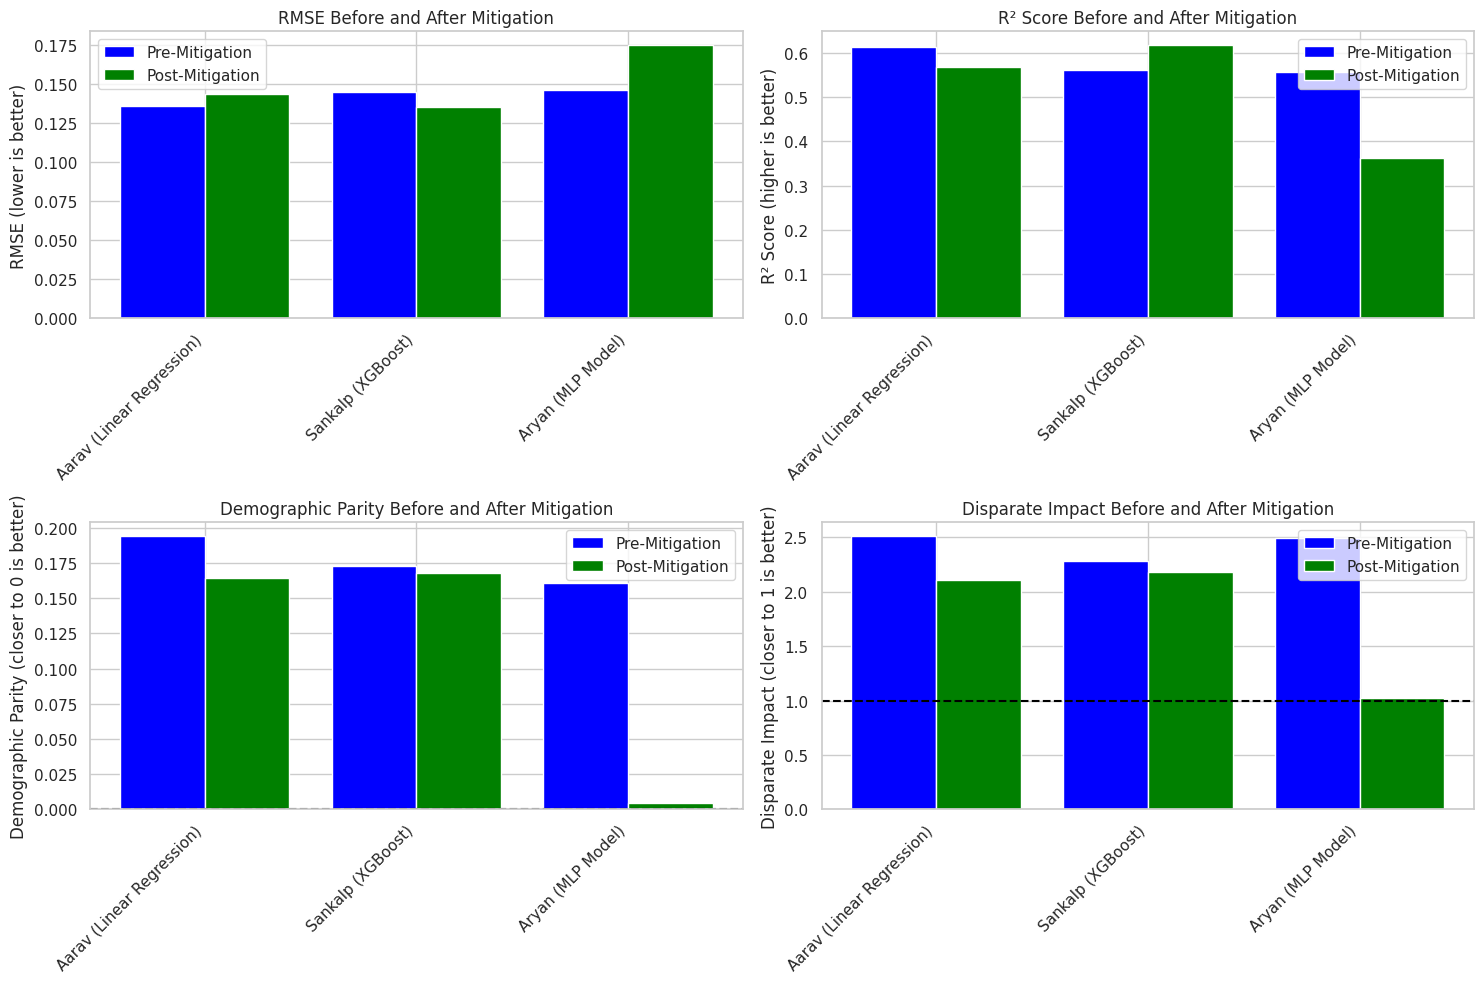

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a simple style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Create separate dataframes
pre_mitigation = overall_results[overall_results['experiment_type'].isna()].copy()
post_mitigation = overall_results[~overall_results['experiment_type'].isna()].copy()

# Create simple labels
pre_mitigation['label'] = pre_mitigation['teammate_name'] + " (" + pre_mitigation['predictor_model'] + ")"
labels = pre_mitigation['label'].tolist()

# Create matched arrays for proper plotting
pre_indices = []
post_indices = []

for i, pre_row in pre_mitigation.iterrows():
    # For SVM model, there's no post-mitigation result
    if pre_row['predictor_model'] == 'SVM':
        continue

    # For others, find the matching post-mitigation row
    teammate_num = pre_row['teammate'].split(' ')[1] if isinstance(pre_row['teammate'], str) else None
    matching_post = post_mitigation[post_mitigation['teammate'].str.contains(str(teammate_num), na=False)]

    if not matching_post.empty:
        pre_indices.append(i)
        post_indices.append(matching_post.index[0])

# Extract matched rows
matched_pre = pre_mitigation.loc[pre_indices]
matched_post = post_mitigation.loc[post_indices]
matched_labels = matched_pre['label'].tolist()

# Create position arrays for bars
x = np.arange(len(matched_labels))

# Plot 1: RMSE Comparison
plt.subplot(2, 2, 1)
plt.bar(x - 0.2, matched_pre['rmse'], width=0.4, label='Pre-Mitigation', color='blue')
plt.bar(x + 0.2, matched_post['rmse'], width=0.4, label='Post-Mitigation', color='green')
plt.ylabel('RMSE (lower is better)')
plt.title('RMSE Before and After Mitigation')
plt.xticks(x, matched_labels, rotation=45, ha='right')
plt.legend()

# Plot 2: R² Score Comparison
plt.subplot(2, 2, 2)
plt.bar(x - 0.2, matched_pre['r2_score'], width=0.4, label='Pre-Mitigation', color='blue')
plt.bar(x + 0.2, matched_post['r2_score'], width=0.4, label='Post-Mitigation', color='green')
plt.ylabel('R² Score (higher is better)')
plt.title('R² Score Before and After Mitigation')
plt.xticks(x, matched_labels, rotation=45, ha='right')
plt.legend()

# Plot 3: Demographic Parity
plt.subplot(2, 2, 3)
plt.bar(x - 0.2, matched_pre['demographic_parity'], width=0.4, label='Pre-Mitigation', color='blue')
plt.bar(x + 0.2, matched_post['demographic_parity'], width=0.4, label='Post-Mitigation', color='green')
plt.ylabel('Demographic Parity (closer to 0 is better)')
plt.title('Demographic Parity Before and After Mitigation')
plt.xticks(x, matched_labels, rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()

# Plot 4: Disparate Impact
plt.subplot(2, 2, 4)
plt.bar(x - 0.2, matched_pre['disparate_impact'], width=0.4, label='Pre-Mitigation', color='blue')
plt.bar(x + 0.2, matched_post['disparate_impact'], width=0.4, label='Post-Mitigation', color='green')
plt.ylabel('Disparate Impact (closer to 1 is better)')
plt.title('Disparate Impact Before and After Mitigation')
plt.xticks(x, matched_labels, rotation=45, ha='right')
plt.axhline(y=1, color='black', linestyle='--')
plt.legend()

plt.tight_layout()
plt.savefig('simple_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


## Performance Analysis

1. **Pre-Mitigation Models**:
   - Teammate 2's SVM model achieved the best overall performance with the highest R² score (0.617446) and lowest RMSE (0.135361).
   - Teammate 1's Linear Regression model showed competitive performance with an R² of 0.613066.
   - All models had similar MAE values around 0.095-0.098.

2. **Fairness Metrics**:
   - All pre-mitigation models showed significant fairness issues with demographic parity ranging from 0.147 to 0.194 and disparate impact values far from the ideal 1.0 (ranging from 1.96 to 2.51).
   - Teammate 1's Linear Regression had the best equalized odds (0.074995), suggesting it performed most consistently across demographic groups.

## Mitigation Strategies

1. **Effectiveness of Different Approaches**:
   - **Preprocessing** (Correlation Remover used by Teammate 1): Improved equalized odds (0.055893) but slightly decreased prediction accuracy (higher RMSE and lower R²).
   - **In-processing** (Optimization used by Teammate 2): Maintained strong performance metrics (R² of 0.617342) with minimal impact on model accuracy while slightly improving fairness metrics.
   - **Postprocessing** (Wasserstein Barycenter method used by Teammate 3): Significantly improved fairness metrics (disparate impact closer to 1.0 at 1.022817 and demographic parity reduced to 0.004251) but at substantial cost to model performance (R² dropped to 0.361457).

## Conclusion
The optimal approach depends on chosen priorities:

- If predictive accuracy is the primary concern with fairness as a secondary goal, Teammate 2's in-processing optimization shows the best balance.
- If fairness is paramount even at the cost of some accuracy, Teammate 3's postprocessing method achieved near-perfect demographic parity.
- For a middle ground, Teammate 1's preprocessing approach offers modest improvements in fairness with reasonable performance trade-offs.

The results demonstrate the classic accuracy-fairness trade-off in machine learning, with more aggressive fairness improvements typically coming at higher costs to predictive performance.

# References

[List the references you used to complete this milestone here.]
- Teammate 1: https://fairlearn.org/main/api_reference/generated/fairlearn.preprocessing.CorrelationRemover.html
- Teammate 2: https://stackoverflow.com/questions/59683944/creating-a-custom-objective-function-in-for-xgboost-xgbregressor
- Teammate 3: https://holisticai.readthedocs.io/en/latest/gallery/tutorials/bias/mitigating_bias/regression/examples/example_us_crime.html


# Disclosures

[Disclose use of generative AI and similar tools here.]
- Teammate 1: I used Claude to validate the results, as well as to confirm the accuracy of my conclusions.
- Teammate 2: I used Gemini to help understand the custom objective function that incorporates a fairness penalty.
- **Teammate 3:** I used ChatGPT to understand the **Wasserstein Barycenter** method and how it can be applied to mitigate bias in machine learning models.
